<a href="https://colab.research.google.com/github/yossrlouati/task2-prediction-using-unsupervised-ML/blob/main/task2_unsupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [12]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

**Reading the data**

In [15]:
iris_data=pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")

iris_data.head() # See the first 5 rows

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


**Finding the optimum nbr of clusters K using elbow method**

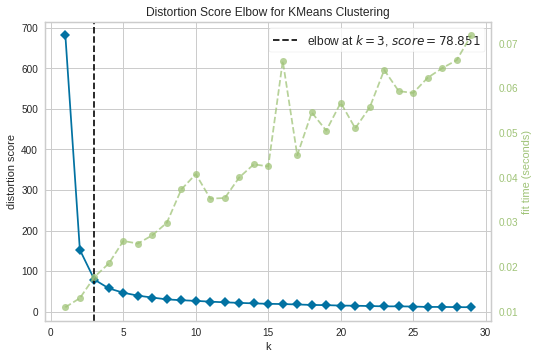

In [38]:
#preparing the data
X = iris_data.iloc[:, [0, 1, 2, 3]].values 


# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,30), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()

From this we choose K=3

**Applying K-means**

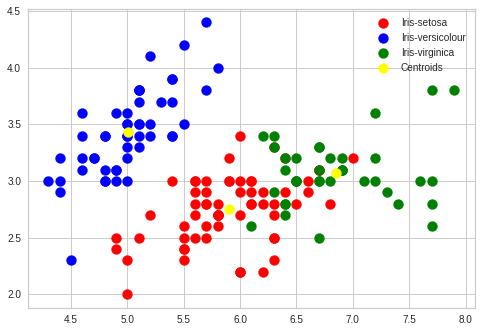

In [40]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y = kmeans.fit_predict(X)

# Visualising the clusters - On the first two columns
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()